In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def stringToSeconds(t):
    h,m,s = map(int, t.split(":"))
    return h*60*60 + m*60 + s

def secondsToString(s):
    h,m,s = s//(60*60), (s%(60*60))//60, s%60
    return "{:02}:{:02}:{:02}".format(h,m,s)

In [3]:
data2020 = {
1: {"part1": "00:07:50", "part2": "00:08:20", "cleanup": "00:27:22"},
2: {"part1": "00:01:07", "part2": "00:05:42", "cleanup": "00:23:04"},
3: {"part1": "00:06:24", "part2": "00:24:13", "cleanup": "00:28:12"},
4: {"part1": "00:08:14", "part2": "00:13:34", "cleanup": "00:40:32"},
5: {"part1": "00:04:43", "part2": "00:12:02", "cleanup": "00:22:02"},
6: {"part1": "00:06:09", "part2": "00:06:23", "cleanup": "00:15:19"},
7: {"part1": "00:09:35", "part2": "00:13:31", "cleanup": "00:41:02"},
8: {"part1": "00:05:10", "part2": "00:14:01", "cleanup": "00:36:46"},
9: {"part1": "00:01:57", "part2": "00:05:41", "cleanup": "00:53:51"},
10: {"part1": "00:03:57", "part2": "00:22:19", "cleanup": "00:32:10"},
11: {"part1": "00:05:30", "part2": "00:21:04", "cleanup": "01:28:09"},
12: {"part1": "00:07:19", "part2": "00:46:52", "cleanup": "01:07:03"},
13: {"part1": "00:04:51", "part2": "01:14:13", "cleanup": "02:06:33"},
14: {"part1": "00:12:24", "part2": "00:22:29", "cleanup": "00:31:31"},
15: {"part1": "00:06:10", "part2": "00:07:27", "cleanup": "00:19:26"},
16: {"part1": "00:08:10", "part2": "00:34:58", "cleanup": "01:36:39"},
17: {"part1": "00:16:20", "part2": "00:17:47", "cleanup": "00:55:10"},
18: {"part1": "01:12:32", "part2": "01:22:31", "cleanup": "02:10:01"},
19: {"part1": "00:35:46", "part2": "00:52:28", "cleanup": "01:21:57"},
20: {"part1": "00:23:41", "part2": "04:01:31", "cleanup": "05:31:48"},
21: {"part1": "00:15:36", "part2": "00:17:26", "cleanup": "01:04:57"},
22: {"part1": "00:09:23", "part2": "00:38:36", "cleanup": "01:17:40"},
23: {"part1": "00:24:29", "part2": "01:11:45", "cleanup": "01:33:05"},
24: {"part1": "00:19:48", "part2": "00:31:22", "cleanup": "01:26:58"},
25: {"part1": "00:12:59", "part2": "00:13:02", "cleanup": "01:04:35"}
}

leaderboards2020 = {
1: [1052, 402],
2: [2, 222],
3: [1120, 3823],
4: [920, 121],
5: [190, 775],
6: [1694, 335],
7: [153, 89],
8: [479, 725],
9: [12, 51],
10: [104, 874],
11: [23, 346],
12: [356, 2997],
13: [172, 1924],
14: [549, 269],
15: [129, 40],
16: [205, 549],
17: [340, 227],
18: [3735, 2693],
19: [844, 520],
20: [333, 1201],
21: [267, 134],
22: [973, 773],
23: [703, 657],
24: [1041, 659],
25: [643, 514]
}

track2020 = {
2: {"points": 99, "position": 47},
3: {"points": 99, "position": 81},
4: {"points": 99, "position": 104},
5: {"points": 99, "position": 126},
6: {"points": 99, "position": 151},
7: {"points": 111, "position": 155},
8: {"points": 111, "position": 170},
9: {"points": 250, "position": 91},
10: {"points": 250, "position": 107},
11: {"points": 328, "position": 83},
12: {"points": 328, "position": 92},
13: {"points": 328, "position": 98},
14: {"points": 328, "position": 108},
15: {"points": 389, "position": 99},
16: {"points": 389, "position": 106},
17: {"points": 389, "position": 114},
18: {"points": 389, "position": 117},
19: {"points": 389, "position": 123},
20: {"points": 389, "position": 133},
21: {"points": 389, "position": 141},
22: {"points": 389, "position": 148},
23: {"points": 389, "position": 154},
24: {"points": 389, "position": 161},
25: {"points": 389, "position": 167}
}

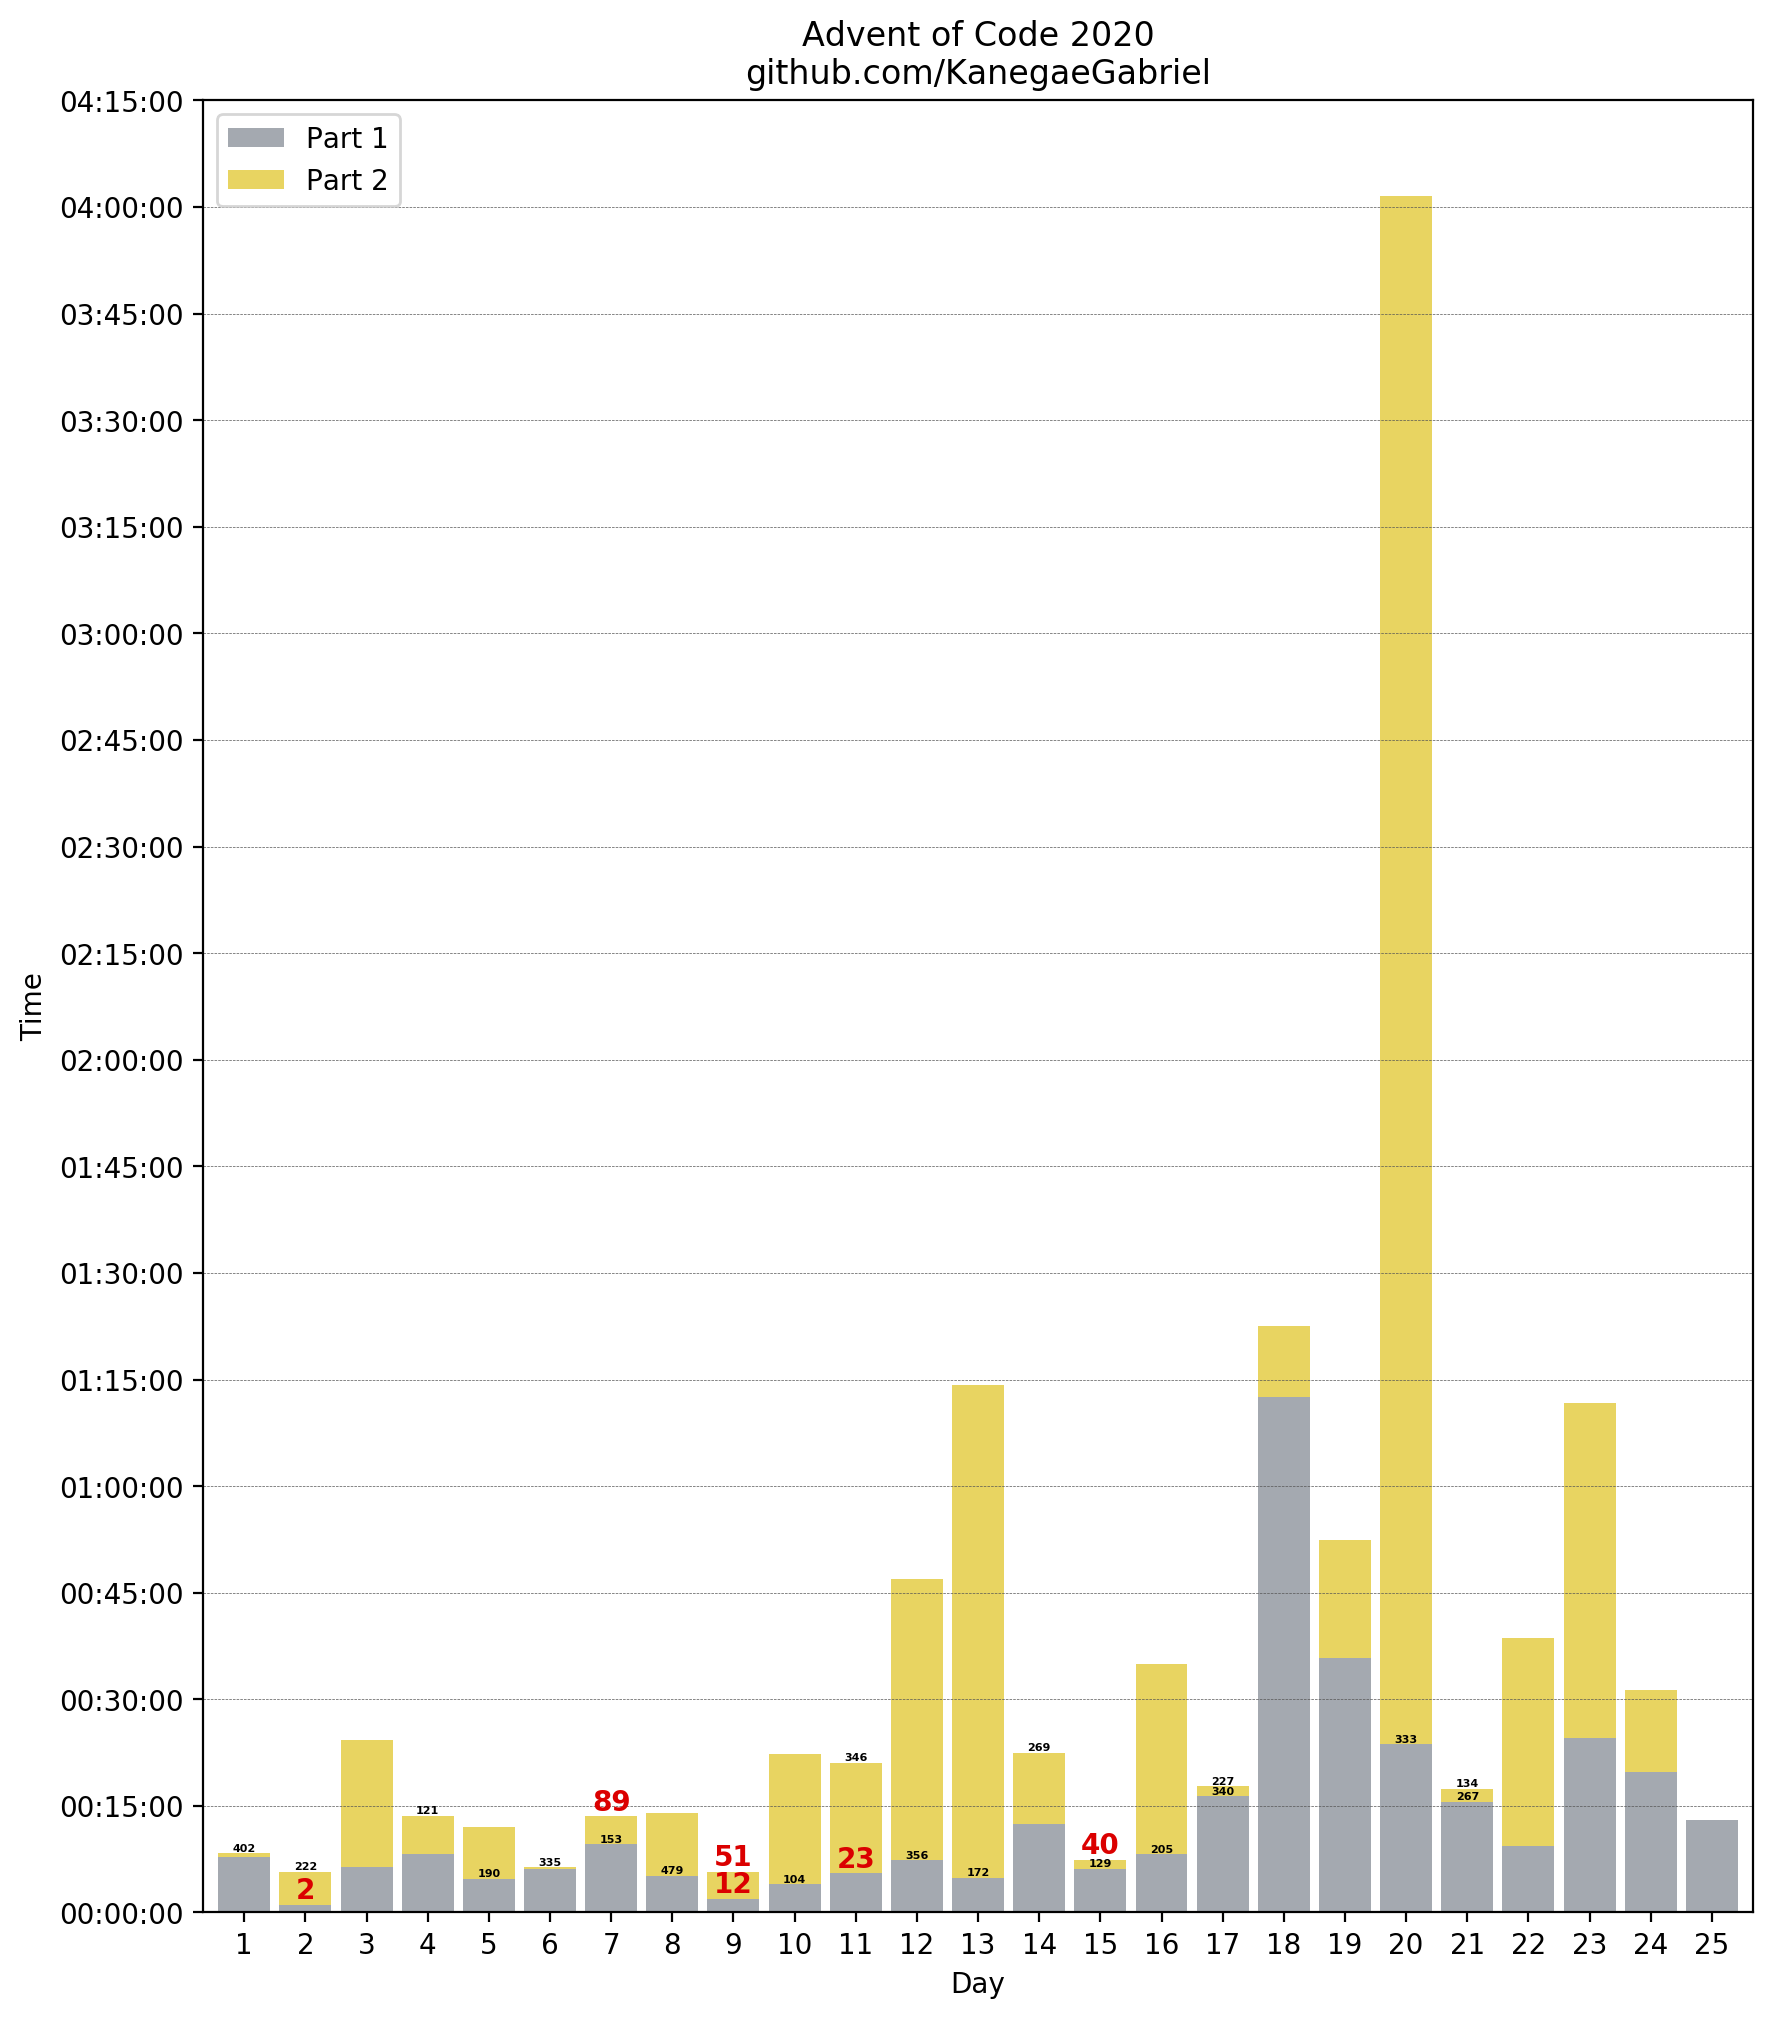

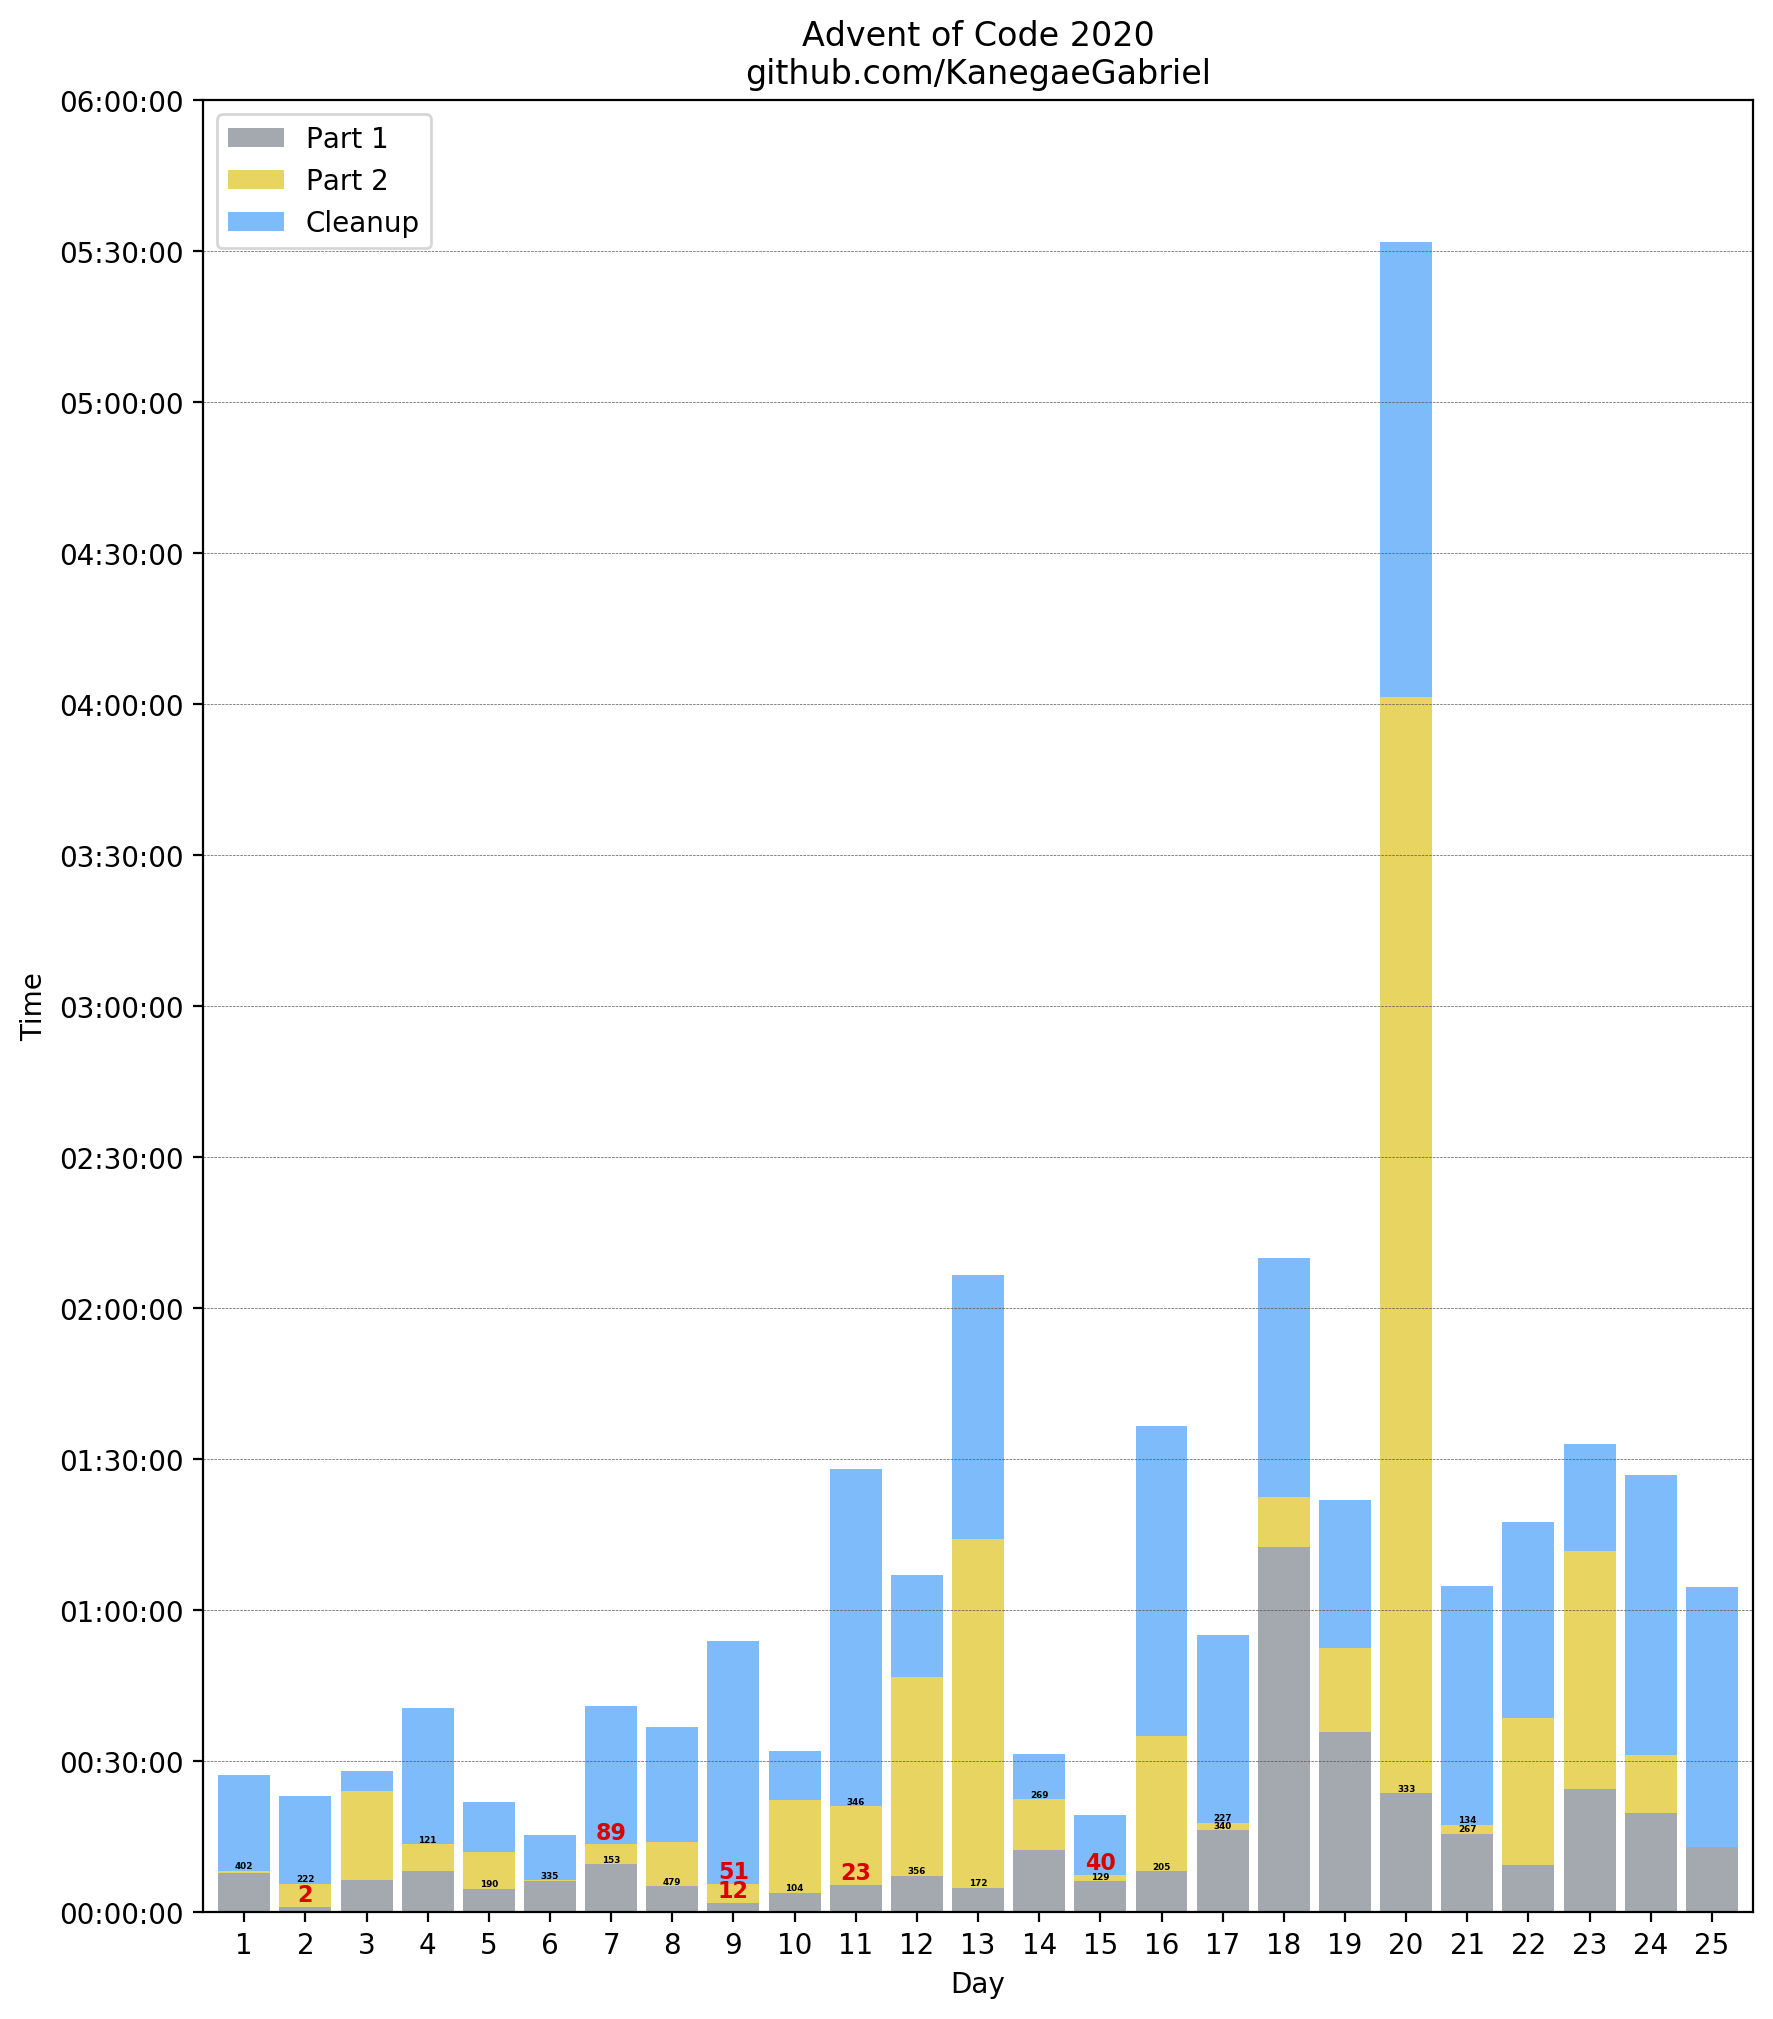

In [4]:
def getGraph(data, leaderboards, year, minutesEachTick=15, withCleanup=False):
    idxs = range(len(data))
    width = 0.85

    fig = plt.figure(figsize=(10, 12), dpi=200)
    ax = fig.add_subplot(1, 1, 1)
    plt.margins(0.01, 0.01)
    
    if withCleanup:
        cleanupData = [stringToSeconds(data[d]["cleanup"]) for d in data]
        cleanupBars = plt.bar(idxs, cleanupData, width, color="#7dbbfa", label="Cleanup")

    fontSizeBig = 10
    fontSizeSmall = 4
    fontSizeSmol = 2.5
    
    if withCleanup:
        fontSizeBig *= 0.8
        fontSizeSmall *= 0.8
        fontSizeSmol *= 0.8
        
    part2Data = [stringToSeconds(data[d]["part2"]) for d in data]
    part2Bars = plt.bar(idxs, part2Data, width, color="#e8d461", label="Part 2")

    part1Data = [stringToSeconds(data[d]["part1"]) for d in data]
    part1Bars = plt.bar(idxs, part1Data, width, color="#a4a9b0", label="Part 1")

    plt.title("Advent of Code {}\ngithub.com/KanegaeGabriel".format(year))
    plt.xlabel("Day")
    plt.ylabel("Time")
    
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles=reversed(handles), labels=reversed(labels), loc="upper left")
    
    plt.xticks(idxs, range(1, len(data)+1))
    
    secondsEachTick = minutesEachTick*60
    
    maxTime = max(cleanupData if withCleanup else part2Data)
    totalTicks = (maxTime//secondsEachTick) + 2
    maxTime = totalTicks*secondsEachTick
    plt.yticks(*zip(*[(t*secondsEachTick, secondsToString(t*secondsEachTick)) for t in range(totalTicks)]))

    for t in range(totalTicks):
        plt.axhline(y=t*secondsEachTick, linewidth=0.25, color="#555555", ls="--")

    for part, bars in enumerate([part1Bars, part2Bars]):
        for day, rect in enumerate(bars):
            pos = leaderboards[day+1][part]
            if not pos: continue
            if pos <= 100:
                plt.annotate(pos,
                             xy=(rect.get_x() + rect.get_width()/2, rect.get_height()),
                             ha="center", va="bottom",
                             color="#db0000", fontsize=fontSizeBig, weight="bold")
            elif pos <= 500:
                plt.annotate(pos,
                             xy=(rect.get_x() + rect.get_width()/2, rect.get_height()),
                             ha="center", va="bottom",
                             color="#000000", fontsize=fontSizeSmall, weight="bold")
            elif pos <= 1000 and not withCleanup:
                continue
                plt.annotate(pos,
                             xy=(rect.get_x() + rect.get_width()/2, rect.get_height()),
                             ha="center", va="bottom",
                             color="#000000", fontsize=fontSizeSmol, weight="bold")
    
    plt.show()
    fig.tight_layout()
    
    if withCleanup:
        filename = "graph-{}-cleanup.png".format(year)
    else:
        filename = "graph-{}.png".format(year)
    fig.savefig(filename)

getGraph(data2020, leaderboards2020, 2020, 15)
getGraph(data2020, leaderboards2020, 2020, 30, withCleanup=True)